    CBS has mostly positive sentiments with just a few negative.
    New York Times is predodominanlty negative
    CNN has a almost balanced(neutral) sediment


In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_user = ['@BBC', '@CBS', "@CNN", "@FoxNews", "@nytimes"]
filename = ["bbc_sentiment", "cbs_sentiment", "cnn_sentiment", "fox_sentiment", "nyt_sentiment"]


In [17]:
def News_media(target):
    counter = 1
    sentiments = []
    public_tweet = api.user_timeline(target, count = 100 )
    
    for tweet in public_tweet :
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        
        counter = counter + 1
        
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending=False, inplace = True)  
    return  data

In [18]:
bbc_sentiment = News_media('@BBC')
cbs_sentiment = News_media('@CBS')
cnn_sentiment = News_media("@CNN")
fox_sentiment = News_media("@FoxNews")
nyt_sentiment = News_media("@nytimes")

In [19]:
def plotting_scatter(x, y, color, label) :  
    return plt.scatter(x, y, c = color, alpha = 0.5,  s = 200,  label = label)

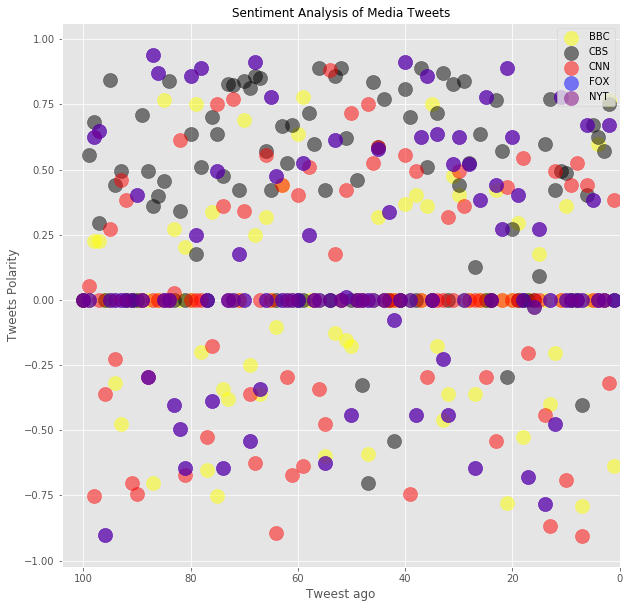

In [16]:
plt.figure(figsize =(10,10))

plotting_scatter(bbc_sentiment['Tweets ago'], bbc_sentiment['Compound'], "yellow", 'BBC')
plotting_scatter(cbs_sentiment['Tweets ago'], cbs_sentiment['Compound'], "black", 'CBS')
plotting_scatter(cnn_sentiment['Tweets ago'], cnn_sentiment['Compound'], "red", 'CNN')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "blue", 'FOX')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "purple", 'NYT')

plt.legend(loc = "upper right")
plt.title("Sentiment Analysis of Media Tweets" ,fontsize = 12)
plt.xlabel("Tweest ago")
plt.ylabel("Tweets Polarity")
plt.xlim(104,-0.04)
plt.show()
plt.savefig("News Media Tweets")

In [8]:
x =  {
    "BBC" : np.mean(bbc_sentiment['Compound']), 
    "CBS" : np.mean(cbs_sentiment['Compound']),
    "CNN" : np.mean(cnn_sentiment['Compound']),
    "FOX": np.mean(fox_sentiment['Compound']),
    "NYT": np.mean(nyt_sentiment['Compound']) }
x

{'BBC': 0.006919999999999997,
 'CBS': 0.39088399999999995,
 'CNN': 0.014298999999999992,
 'FOX': 0.12401100000000001,
 'NYT': -0.04637200000000002}

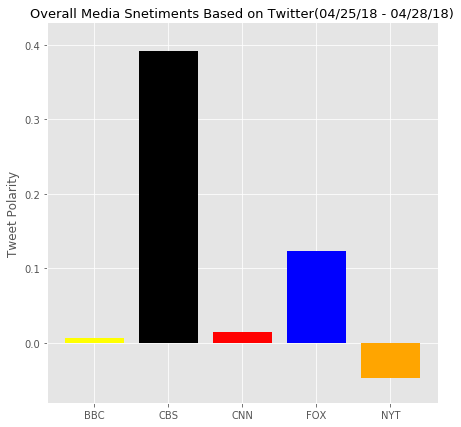

In [15]:
plt.figure(figsize = (7,7))
plt.bar(x.keys(), x.values(), color = ['yellow', 'black', 'red', 'blue', 'orange'])
plt.title('Overall Media Snetiments Based on Twitter(04/25/18 - 04/28/18)', fontsize = 13)
plt.ylabel("Tweet Polarity")
plt.ylim(-0.08, 0.43)
plt.show()
plt.savefig("Twitter Sentiments")